In [1]:
from invisibleroads_macros_disk import make_folder
from os import environ

input_folder = environ.get(
    'CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = make_folder(environ.get(
    'CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output'))
log_folder = make_folder(environ.get(
    'CROSSCOMPUTE_LOG_FOLDER', 'tests/standard/log'))
debug_folder = make_folder(environ.get(
    'CROSSCOMPUTE_DEBUG_FOLDER', 'tests/standard/debug'))

In [2]:
from pytrends.request import TrendReq
r = TrendReq()

In [3]:
from os.path import join
search_terms = [_.strip() for _ in open(join(
    input_folder, 'search-terms.txt'), 'rt')]
search_terms

['east coast swing', 'west coast swing', 'lindy hop', 'balboa swing']

In [4]:
r.build_payload(kw_list=search_terms)

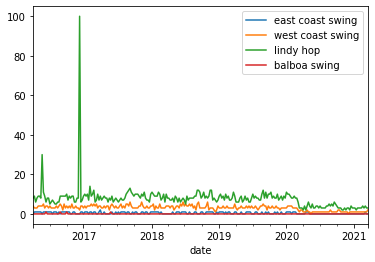

In [5]:
import matplotlib.pyplot as plt
t = r.interest_over_time()
t.plot()
plt.savefig(join(output_folder, 'interest-over-time.png'))

In [6]:
t = r.interest_by_region()
t['+'] = t.sum(axis=1)
t = t[t['+'] > 0]
del t['+']
t.to_csv(join(output_folder, 'interest-by-region.csv'))

In [7]:
d = r.related_queries()

In [8]:
import pandas as pd

In [9]:
for rank_type in 'top', 'rising':
    tables = []
    for search_term in search_terms:
        t = d[search_term][rank_type]
        if t is None:
            continue
        t['term'] = search_term
        tables.append(t[['term', 'query', 'value']][:10])
    pd.concat(tables).to_csv(join(
        output_folder,
        f'related-{rank_type}.csv'), index=False)

In [10]:
tables = []
for search_term in search_terms:
    ds = r.suggestions(keyword=search_term)
    t = pd.DataFrame(ds)
    t['term'] = search_term
    if not len(t):
        continue
    tables.append(t[['term', 'title', 'type']])
pd.concat(tables).to_csv(join(
    output_folder, 'suggestions.csv'), index=False)